`titanic_train.csv` : [kaggle.com](https://www.kaggle.com/c/titanic/data)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


titanic_df = pd.read_csv('../data/titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Null 개수 확인
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
# Age : 평균 나이
# Cabin, Embarked : N으로 결측값 대체
titanic_df['Age'].mean()

29.69911764705882

In [4]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

In [5]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
print(titanic_df['Sex'].value_counts())
print(titanic_df['Cabin'].value_counts())
print(titanic_df['Embarked'].value_counts())

male      577
female    314
Name: Sex, dtype: int64
N              687
C23 C25 C27      4
B96 B98          4
G6               4
D                3
              ... 
A10              1
B39              1
C148             1
B78              1
A31              1
Name: Cabin, Length: 148, dtype: int64
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [7]:
# Cabin 첫 문자열만
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

# EDA

## 성별에 따른 생존자수

In [8]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

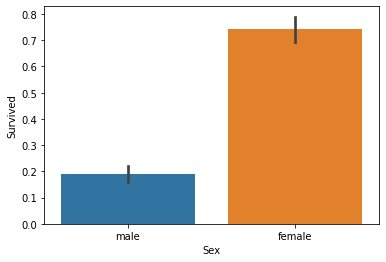

In [9]:
# 성별 생존 확률
sns.barplot(data=titanic_df, x='Sex', y='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

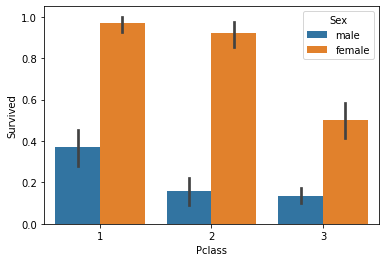

In [10]:
# 등급별/성별 생존
sns.barplot(data=titanic_df, x='Pclass', y='Survived', hue='Sex')

## 구간화

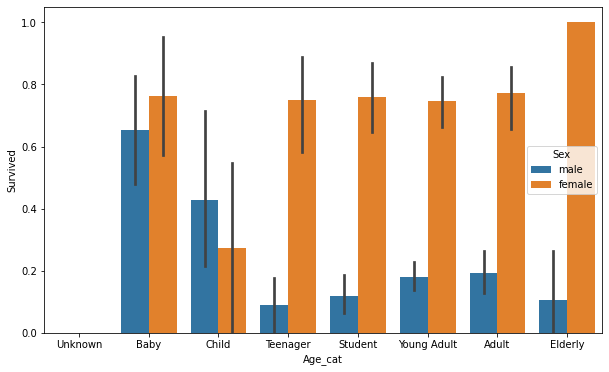

In [11]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    
    return cat

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

plt.figure(figsize=(10, 6))
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x:get_category(x))
sns.barplot(data=titanic_df, x='Age_cat', y='Survived', hue='Sex', order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

## 인코딩

In [12]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

tatinic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


## 삭제

In [13]:
# 불필요한 변수 제거
titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,3
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,7,3


### 함수로 만들어 재활용

In [14]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1] # 첫문자만 추출
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# Data Preprocessing
def transform_featrues(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

# 생존자 예측 프로세스

## 1단계. 데이터 로딩

In [15]:
titanic_df = pd.read_csv('../data/titanic_train.csv')

# Label
y_titanic_df = titanic_df['Survived']

# Features
X_titanic_df = titanic_df.drop('Survived', axis=1)

## 2단계. 데이터 전처리

In [16]:
X_titanic_df = transform_featrues(X_titanic_df)
X_titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


## 3단계. Data Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=11)

## 4단계. 알고리즘 적용
- DecisionTreeClassifier
- RandomForestClassifier
- LogisticRegression

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Estimator 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(max_iter=200)

# 학습
dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)

# 예측
dt_pred = dt_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
lr_pred = lr_clf.predict(X_test)

# 정확도 평가
dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
lr_acc = accuracy_score(y_test, lr_pred)

print(f'DecisionTreeClassifier 정확도 : {dt_acc:.4f}')
print(f'RandomForestClassifier 정확도 : {rf_acc:.4f}')
print(f'LogisticRegression 정확도 : {lr_acc:.4f}')

DecisionTreeClassifier 정확도 : 0.7877
RandomForestClassifier 정확도 : 0.8547
LogisticRegression 정확도 : 0.8492


## 5단계. 교차 검증

### KFold

In [19]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    print(clf)
    for iter_n, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # df.values[index] : df의 index행을 가져옴
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc = accuracy_score(y_test, pred)
        scores.append(acc)
        
        print(f'교차 검증 {iter_n} 정확도 : {acc:.4f}')
    
    mean_score = np.mean(scores)
    print(f'평균 정확도 : {mean_score:.4f}')

In [20]:
exec_kfold(rf_clf)

RandomForestClassifier(random_state=11)
교차 검증 0 정확도 : 0.7933
교차 검증 1 정확도 : 0.8090
교차 검증 2 정확도 : 0.8371
교차 검증 3 정확도 : 0.7753
교차 검증 4 정확도 : 0.8596
평균 정확도 : 0.8148


In [21]:
exec_kfold(dt_clf)

DecisionTreeClassifier(random_state=11)
교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도 : 0.7823


In [22]:
exec_kfold(lr_clf)

LogisticRegression(max_iter=200)
교차 검증 0 정확도 : 0.8045
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7753
교차 검증 3 정확도 : 0.7528
교차 검증 4 정확도 : 0.8202
평균 정확도 : 0.7867


In [23]:
idx = [0, 2, 3]
X_titanic_df.values[idx]

array([[ 3.   ,  1.   , 22.   ,  1.   ,  0.   ,  7.25 ,  7.   ,  3.   ],
       [ 3.   ,  0.   , 26.   ,  0.   ,  0.   ,  7.925,  7.   ,  3.   ],
       [ 1.   ,  0.   , 35.   ,  1.   ,  0.   , 53.1  ,  2.   ,  3.   ]])

In [24]:
X_titanic_df.loc[idx, :]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.250,7,3
2,3,0,26.0,0,0,7.925,7,3
3,1,0,35.0,1,0,53.100,2,3


### StratifiedKFold

In [25]:
from sklearn.model_selection import StratifiedKFold

def exec_skf(clf, folds=5):
    skf = StratifiedKFold(n_splits=folds)
    scores = []
    print(clf)
    for iter_n, (train_index, test_index) in enumerate(skf.split(X_titanic_df, y_titanic_df)):
        # df.values[index] : df의 index행을 가져옴
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc = accuracy_score(y_test, pred)
        scores.append(acc)
        
        print(f'Stratified 교차 검증 {iter_n} 정확도 : {acc:.4f}')
    
    mean_score = np.mean(scores)
    print(f'평균 정확도 : {mean_score:.4f}')

In [26]:
exec_skf(rf_clf)

RandomForestClassifier(random_state=11)
Stratified 교차 검증 0 정확도 : 0.7933
Stratified 교차 검증 1 정확도 : 0.7978
Stratified 교차 검증 2 정확도 : 0.8483
Stratified 교차 검증 3 정확도 : 0.7640
Stratified 교차 검증 4 정확도 : 0.8652
평균 정확도 : 0.8137


### cross_val_score = StratifiedKFold

In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_clf, X_titanic_df, y_titanic_df, cv=5)
print(rf_clf)
for iter_n, acc in enumerate(scores):
    print(f'교차 검증 {iter_n} 정확도 : {acc:.4f}')
mean_score = np.mean(scores)
print(f'평균 정확도 : {mean_score:.4f}')

RandomForestClassifier(random_state=11)
교차 검증 0 정확도 : 0.7933
교차 검증 1 정확도 : 0.7978
교차 검증 2 정확도 : 0.8483
교차 검증 3 정확도 : 0.7640
교차 검증 4 정확도 : 0.8652
평균 정확도 : 0.8137


In [28]:
scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
print(dt_clf)
for iter_n, acc in enumerate(scores):
    print(f'교차 검증 {iter_n} 정확도 : {acc:.4f}')
mean_score = np.mean(scores)
print(f'평균 정확도 : {mean_score:.4f}')

DecisionTreeClassifier(random_state=11)
교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도 : 0.7879


In [29]:
scores = cross_val_score(lr_clf, X_titanic_df, y_titanic_df, cv=5)
print(lr_clf)
for iter_n, acc in enumerate(scores):
    print(f'교차 검증 {iter_n} 정확도 : {acc:.4f}')
mean_score = np.mean(scores)
print(f'평균 정확도 : {mean_score:.4f}')

LogisticRegression(max_iter=200)
교차 검증 0 정확도 : 0.7933
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7809
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8090
평균 정확도 : 0.7867


### GridSearchCV

In [30]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10],
             'min_samples_split':[2, 3, 5],
             'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print(f'GridSearchCV 최고 정확도 : {grid_dclf.best_score_:.4f}')
best_dclf = grid_dclf.best_estimator_

dpred = best_dclf.predict(X_test)
acc = accuracy_score(y_test, dpred)
print(f'Test set의 {dt_clf} 정확도 : {acc:.4f}')

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
Test set의 DecisionTreeClassifier(random_state=11) 정확도 : 0.8715


In [31]:
def best_gridsearchcv(clf, params):
    grid_clf = GridSearchCV(clf, param_grid=params, scoring='accuracy', cv=5)
    grid_clf.fit(X_train, y_train)
    print(clf)
    print('GridSearchCV 최적 하이퍼 파라미터 :', grid_clf.best_params_)
    print(f'GridSearchCV 최고 정확도 : {grid_clf.best_score_:.4f}')
    best_clf = grid_clf.best_estimator_

    pred = best_clf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print(f'Test set의 {clf} 정확도 : {acc:.4f}')

In [32]:
parameters = {'max_depth':[2, 3, 5, 10],
             'min_samples_split':[2, 3, 5],
             'min_samples_leaf':[1, 5, 8]}
best_gridsearchcv(rf_clf, parameters)

RandomForestClassifier(random_state=11)
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.8146
Test set의 RandomForestClassifier(random_state=11) 정확도 : 0.8827


In [33]:
parameters = {'tol':[0.00001, 0.0001, 0.001],
              'C':[0.5, 1.0, 1.5, 2.0]}
best_gridsearchcv(lr_clf, parameters)

C:\Users\master\anaconda3\envs\multi\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\master\anaconda3\envs\multi\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

LogisticRegression(max_iter=200)
GridSearchCV 최적 하이퍼 파라미터 : {'C': 0.5, 'tol': 1e-05}
GridSearchCV 최고 정확도 : 0.7795
Test set의 LogisticRegression(max_iter=200) 정확도 : 0.8547


C:\Users\master\anaconda3\envs\multi\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
